In [1]:
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')
import numpy as np 
import pandas as pd
import pickle, glob
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
from soundscape_viewer import lts_viewer
from soundscape_viewer import data_organize, matrix_operation, clustering
from utility import matrix_operation

In [2]:
year = 2023
place = 'Keelung'
LTS=lts_viewer(path=f'/Volumes/home/DataBase/PAM_pickle/{year}/', place=place)
input_data_23, f_23, time_23 = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,24000])#

year = 2022
LTS=lts_viewer(path=f'/Volumes/home/DataBase/PAM_pickle/{year}/', place=place)
input_data_22, f_22, time_22 = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,24000])
if year == 2022 and place == 'Taoyuan':
    import datetime
    time_22 = np.hstack([time_22, datetime.datetime(2022, 8, 25, 16, 55)]) 

year = 2021
LTS=lts_viewer(path=f'/Volumes/home/DataBase/PAM_pickle/{year}/', place=place)
input_data_21, f_21, time_21 = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,24000])

/Volumes/home/DataBase/PAM_pickle/2023/
['/Volumes/home/DataBase/PAM_pickle/2023/Keelung_041712-050311-5min.pkl', '/Volumes/home/DataBase/PAM_pickle/2023/Keelung_060909-062522-5min.pkl', '/Volumes/home/DataBase/PAM_pickle/2023/Keelung_082912-091404-5min.pkl', '/Volumes/home/DataBase/PAM_pickle/2023/Keelung_121508-010612-5min.pkl']
Loading file: /Volumes/home/DataBase/PAM_pickle/2023/Keelung_041712-050311-5min.pkl
(4603, 512)
Loading file: /Volumes/home/DataBase/PAM_pickle/2023/Keelung_060909-062522-5min.pkl
(4776, 512)
Loading file: /Volumes/home/DataBase/PAM_pickle/2023/Keelung_082912-091404-5min.pkl
(4524, 512)
Loading file: /Volumes/home/DataBase/PAM_pickle/2023/Keelung_121508-010612-5min.pkl
(6396, 512)
(20299, 255)
/Volumes/home/DataBase/PAM_pickle/2022/
['/Volumes/home/DataBase/PAM_pickle/2022/Keelung_042300-051300-5min.pkl', '/Volumes/home/DataBase/PAM_pickle/2022/Keelung_062700-071523-5min.pkl', '/Volumes/home/DataBase/PAM_pickle/2022/Keelung_080800-082323-5min.pkl']
Loading fi

In [3]:
5316, 10076, 15666, 21426, 26898, 31506, 36109, 40885, 45409, 51805

(5316, 10076, 15666, 21426, 26898, 31506, 36109, 40885, 45409, 51805)

In [4]:
15666+5760+5472+4608+4603+4776+4524+6396

51805

In [5]:
# input_data_all = np.vstack((input_data_21, input_data_22,input_data_23))
time_all = np.hstack((time_21, time_22, time_23))
# print(input_data_all.shape, time_all.shape)

In [6]:
path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_2021_*stage_separation/model_array.pkl')[0]
print(path)
file = open(path , 'rb')
model_21 = pickle.load(file)
file.close()
model_21['separation'][0] = model_21['separation'][0][:,:255]
print(model_21['relative_level'][0].shape, model_21['separation'][0].shape)


path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_2022_*stage_separation/model_array.pkl')[0]
print(path)
file = open(path , 'rb')
model_22 = pickle.load(file)
file.close()
print(model_22['relative_level'][0].shape, model_22['separation'][0].shape)


path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_2023_4stage_separation/model_array.pkl')[0]
print(path)
file = open(path , 'rb')
model_23 = pickle.load(file)
file.close()
model_23['separation'][0] = model_23['separation'][0][:,:255]
print(model_23['relative_level'][0].shape, model_23['separation'][0].shape)

../Results/soundsepration/Keelung-5min/20231206_162010_2021_3stage_separation/model_array.pkl
(15666,) (15666, 255)
../Results/soundsepration/Keelung-5min/20240129_100849_2022_3stage_separation/model_array.pkl
(15840,) (15840, 255)
../Results/soundsepration/Keelung-5min/20240125_160851_2023_4stage_separation/model_array.pkl
(20299,) (20299, 255)


In [7]:
type(model_23)

dict

In [8]:
model_all = {}
model_all['relative_level'] = np.hstack((model_21['relative_level'][0], model_22['relative_level'][0], model_23['relative_level'][0]))

model_all['separation'] = np.vstack((model_21['separation'][0], model_22['separation'][0], model_23['separation'][0]))



In [9]:
# save = False

# analysis_result=data_organize()
# s = 1
# print(f'Source: {s}; Fish ')
# model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
# model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
# analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
# value_k = 0.90 if s == 0 else 0.95
# cluster_result=clustering(pca_percent=0.95, k=value_k)
# cluster_result.run(input_data=model['separation'][s-1], f=f, time=time,standardization='max-min')    #
# if save:
#     savepath = path.rsplit('/', 1)[0]
#     cluster_result.save_cluster_feature(filename=f'{savepath}/{place}_S{s}_cluster_scene_features_nostd.csv')
# analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

# print()
# print()


In [13]:
from sklearn.preprocessing import MinMaxScaler
if place == 'Taoyuan':
    timelist = [3996, 8716, 13386, 18459, 25103, 30119, 35072, 39560, 44024, 49256]
    #[3996, 4720+3996, 13386]## Taoyuan 2021
    # [5073,6644+5073,16733]## Taoyuan 2022
    # [4953, 9441, 13905, 19137] ## Taoyuan 2023 
elif place == 'Keelung':
    timelist = [5316, 10076, 15666, 21426, 26898, 31506, 36109, 40885, 45409, 51805]
    #[5760, 5472+5760, 15840]## Keelung 2021
    #[5316, 5316+5038, 15666] ## Keelung 2022
    #[4603, 4603+4776, 4603+4776+4524, 4603+4776+4524+6396] ## Keelung 2023

s=1
save = True
analysis_result=data_organize()
for i in range(len(timelist)):
    t = timelist[i]
    if i == 0:
        model_all['relative_level'][:t]=model_all['relative_level'][:t]-np.min(model_all['relative_level'][:t])
        model_all['relative_level'][:t]=model_all['relative_level'][:t]/np.max(model_all['relative_level'][:t])
        scaler = MinMaxScaler()
        model_all['separation'][:t,:] = scaler.fit_transform(model_all['separation'][:t,:])
        # model['separation'][s-1][:t,:] =model['separation'][s-1][:t,:] -np.matlib.repmat(model['separation'][s-1][:t,:].min(axis=1), model['separation'][s-1][:t,:].shape[1],1).T
        # model['separation'][s-1][:t,:]=np.divide(model['separation'][s-1][:t,:], np.matlib.repmat(model['separation'][s-1][:t,:].max(axis=1), model['separation'][s-1][:t,:].shape[1], 1).T)      

    else:
        pt = timelist[i-1]
        model_all['relative_level'][pt:t]=model_all['relative_level'][pt:t]-np.min(model_all['relative_level'][pt:t])
        model_all['relative_level'][pt:t]=model_all['relative_level'][pt:t]/np.max(model_all['relative_level'][pt:t])
        scaler = MinMaxScaler()
        model_all['separation'][pt:t,:] = scaler.fit_transform(model_all['separation'][pt:t,:])
        # model['separation'][s-1][pt:t,:] =model['separation'][s-1][pt:t,:] -np.matlib.repmat(model['separation'][s-1][pt:t,:].min(axis=1), model['separation'][s-1][pt:t,:].shape[1],1).T
        # model['separation'][s-1][pt:t,:]=np.divide(model['separation'][s-1][pt:t,:], np.matlib.repmat(model['separation'][s-1][pt:t,:].max(axis=1), model['separation'][s-1][pt:t,:].shape[1], 1).T)       
analysis_result.time_fill(time_vec=time_all, data=model_all['relative_level'], header=f'S{s}_level')

value_k = 0.90 if s == 0 else 0.95
cluster_result=clustering(pca_percent=0.9, k=value_k)#value_k)
cluster_result.run(input_data=model_all['separation'], f=f_23, time=time_all)    #
if save:
    savepath = './qqq'
    cluster_result.save_cluster_feature(filename=f'{savepath}/result_normalized_each_stage/{place}_S{s}_cluster_scene_features_std_each_stage.csv') 
analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

if save:
    analysis_result.save_csv(f'{savepath}/result_normalized_each_stage/{place}_S{s}_cluster_std_each_stage.csv')

A new spreadsheet has been created.
dimension reduction by PCA ......
comp: 2, ratio:[0.87544949 0.0525205 ]
Begining to cluster ......
k: 1 , explained variation: 0.0
k: 2 , explained variation: 0.6970836198203819
k: 3 , explained variation: 0.8133648527501867
k: 4 , explained variation: 0.8823993898531981
k: 5 , explained variation: 0.9036226534040451
k: 6 , explained variation: 0.9189874166515267
k: 7 , explained variation: 0.9304932209624278
k: 8 , explained variation: 0.9399571083990671
k: 9 , explained variation: 0.9476295196414021
k: 10 , explained variation: 0.9535792993719872
Final trial: run  10  clusters
Successifully save to ./qqq/result_normalized_each_stage/Keelung_S1_cluster_scene_features_std_each_stage.csv
Successifully save to ./qqq/result_normalized_each_stage/Keelung_S1_cluster_std_each_stage.csv


Index(['Time', 'S1_level', 'S1_Cluster'], dtype='object')
962


<Figure size 640x480 with 0 Axes>

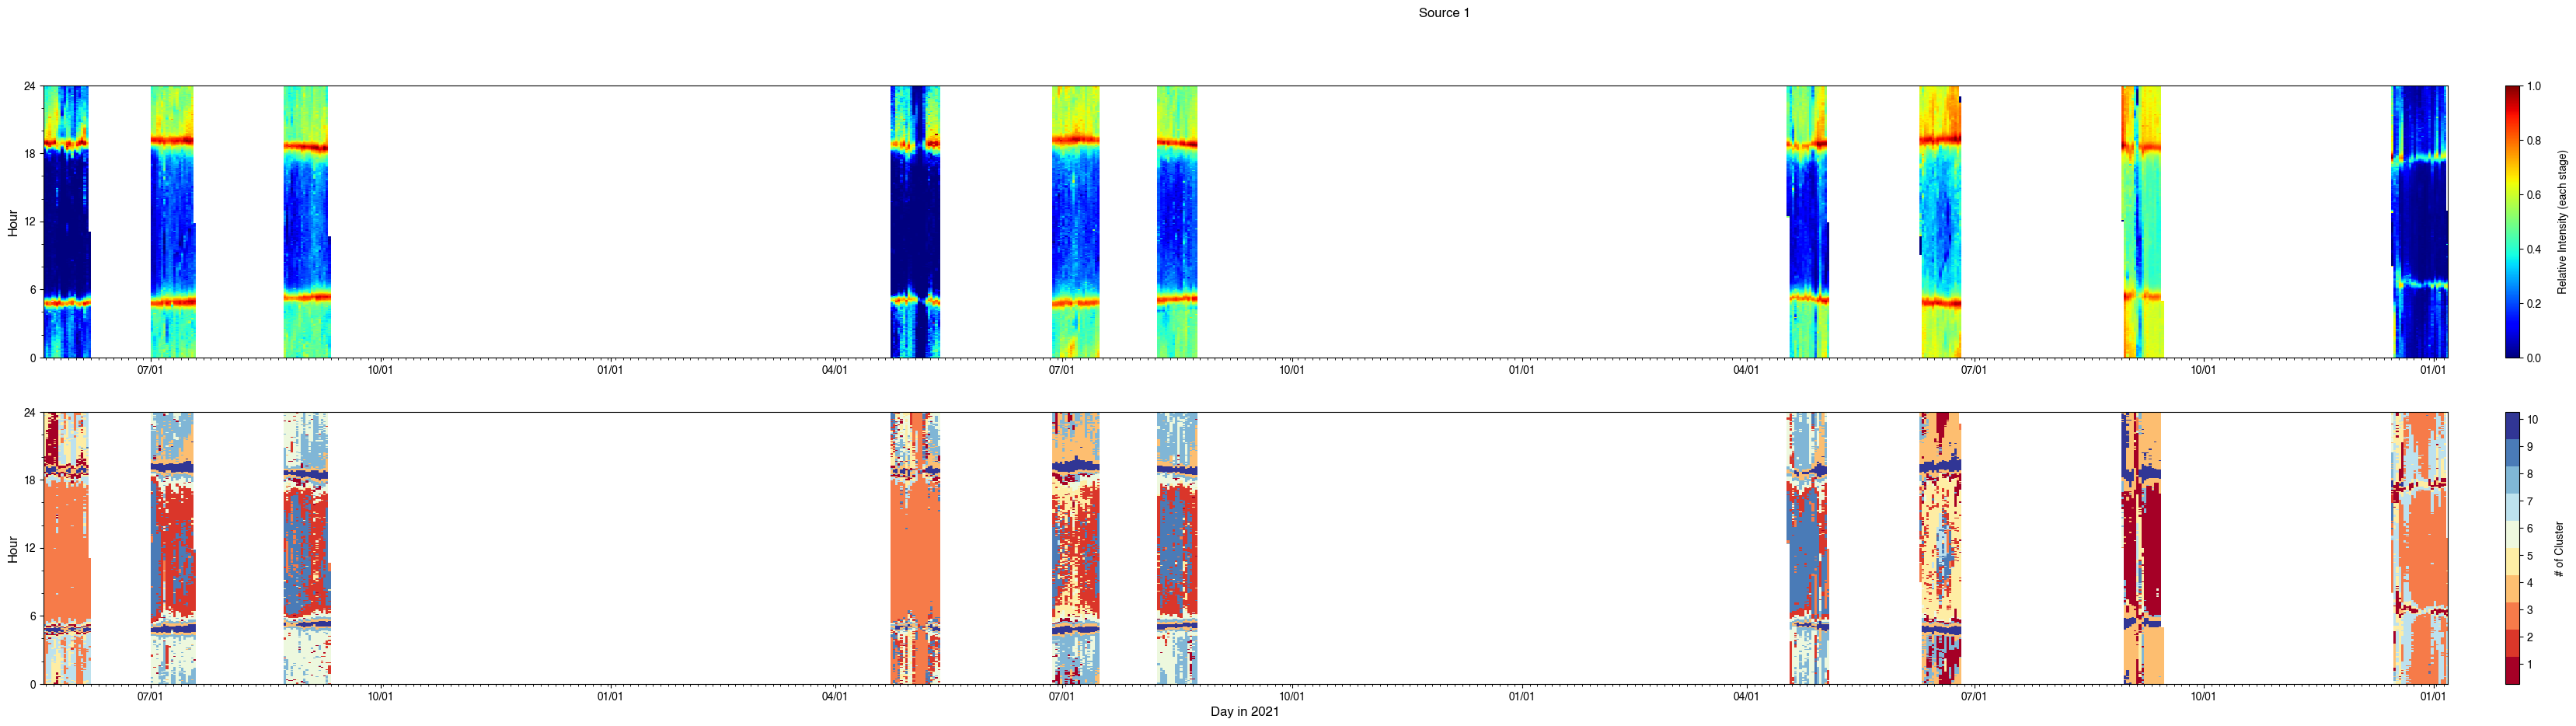

In [14]:
# Investigate the diurnal (y-axis) and seasonal change (x-axis) of source behavior
for i in [s]:# range(1, 5):
    if i  == 0 :
        level, cluster = analysis_result.plot_diurnal(col=i, savefig = save, vmax=0.3, vmin=0,
                                                 file = f'{savepath}/result_normalized_each_stage/{place}_{year}_diurnal_variations_std_each_stage', 
                                                  nan_value=-1,
                                                  ) 
    else:
        level, cluster = analysis_result.plot_diurnal(col=i, savefig = save,
                                         file = f'{savepath}/result_normalized_each_stage/{place}_{year}_diurnal_variations_std_each_stage', 
                                          nan_value=-1,
                                          ) 